<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/Stock_Market_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [2]:
def fetch_financial_data(company):
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

pzu = fetch_financial_data('PZU.PL')
pkn = fetch_financial_data('PKN.PL')
ge = fetch_financial_data('GE')
co = fetch_financial_data('KO')

In [3]:
pzu.columns = ['pzu_' + col.lower() for col in pzu.columns]
pkn.columns = ['pkn_' + col.lower() for col in pkn.columns]
ge.columns = ['ge_' + col.lower() for col in ge.columns]
co.columns = ['co_' + col.lower() for col in co.columns]

In [4]:
data_all = pd.concat(objs=[pkn, pzu, ge, co], axis=1)
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-10-29,54.989,54.998,54.169,54.437,1009269.0,29.831,29.839,29.151,29.252,1298929.0,26.198,26.382,26.100,26.348,47183011.0,36.216,36.421,35.946,36.327,11104173.0
2015-10-30,54.307,54.601,53.868,54.143,1445843.0,29.252,29.549,29.080,29.390,2258996.0,26.243,26.340,25.962,25.972,79081665.0,36.336,36.388,35.956,35.956,18087553.0
2015-11-02,54.153,54.929,53.910,54.773,847234.0,29.390,29.808,29.268,29.526,1304965.0,25.991,26.401,25.933,26.401,66257648.0,35.929,35.965,35.572,35.862,19143069.0
2015-11-03,54.781,55.153,54.143,54.343,1128767.0,29.558,29.705,29.334,29.449,1282410.0,26.235,26.753,26.208,26.576,106705849.0,35.810,35.929,35.497,35.792,11417247.0
2015-11-04,54.376,55.964,54.169,55.032,2590256.0,29.639,29.948,29.449,29.558,1582509.0,26.538,26.753,26.458,26.528,117063966.0,35.887,35.987,35.563,35.634,12354142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,42.490,43.100,41.800,41.800,664705.0,22.200,22.270,21.560,21.700,2898446.0,7.280,7.410,7.270,7.320,73811105.0,49.960,50.430,49.770,49.990,12517411.0
2020-10-22,41.500,42.190,41.000,41.840,847850.0,21.610,22.140,21.290,21.920,3225477.0,7.330,7.750,7.320,7.720,95766854.0,51.170,51.200,50.380,50.680,20189227.0
2020-10-23,42.020,42.700,41.540,41.760,1372466.0,21.990,22.620,21.990,22.530,5260416.0,7.930,8.030,7.560,7.630,132563218.0,51.000,51.180,50.465,50.520,13491265.0


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
pkn_open,1247.0,7.999538e+01,1.921913e+01,4.020000e+01,5.998500e+01,8.361600e+01,9.634350e+01,1.229200e+02
pkn_high,1247.0,8.108908e+01,1.942835e+01,4.030000e+01,6.064250e+01,8.458300e+01,9.771350e+01,1.229200e+02
pkn_low,1247.0,7.880091e+01,1.903952e+01,3.809000e+01,5.909450e+01,8.245900e+01,9.527000e+01,1.208600e+02
pkn_close,1247.0,7.992463e+01,1.925921e+01,3.865000e+01,5.982350e+01,8.346700e+01,9.641000e+01,1.225000e+02
pkn_volume,1247.0,1.065007e+06,6.437792e+05,1.828340e+05,6.493635e+05,9.154220e+05,1.283378e+06,7.733447e+06
pzu_open,1247.0,3.341984e+01,6.189457e+00,2.071700e+01,2.799500e+01,3.626400e+01,3.861400e+01,4.224600e+01
pzu_high,1247.0,3.377725e+01,6.225624e+00,2.079300e+01,2.820200e+01,3.677500e+01,3.894050e+01,4.242300e+01
pzu_low,1247.0,3.300406e+01,6.170693e+00,2.050000e+01,2.752550e+01,3.586500e+01,3.819600e+01,4.177200e+01
pzu_close,1247.0,3.338563e+01,6.199219e+00,2.064900e+01,2.800000e+01,3.625000e+01,3.858350e+01,4.222800e+01
pzu_volume,1247.0,2.151064e+06,1.370086e+06,3.627720e+05,1.304445e+06,1.838184e+06,2.583221e+06,1.472682e+07


In [6]:
data_all.columns

Index(['pkn_open', 'pkn_high', 'pkn_low', 'pkn_close', 'pkn_volume',
       'pzu_open', 'pzu_high', 'pzu_low', 'pzu_close', 'pzu_volume', 'ge_open',
       'ge_high', 'ge_low', 'ge_close', 'ge_volume', 'co_open', 'co_high',
       'co_low', 'co_close', 'co_volume'],
      dtype='object')

In [7]:
data_close = [col for col in data_all.columns if col.endswith('close')]
data_close

['pkn_close', 'pzu_close', 'ge_close', 'co_close']

In [8]:
x = data_all[data_close] # dane - cena zamkniecia 
x.head()

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-10-29,54.437,29.252,26.348,36.327
2015-10-30,54.143,29.390,25.972,35.956
2015-11-02,54.773,29.526,26.401,35.862
2015-11-03,54.343,29.449,26.576,35.792
2015-11-04,55.032,29.558,26.528,35.634


In [9]:
x_2020 = x['2020-01-01' : ] #dane od początku 2020 roku
x.head(5)

,pkn_close,pzu_close,ge_close,co_close
Date,,,,
2015-10-29,54.437,29.252,26.348,36.327
2015-10-30,54.143,29.390,25.972,35.956
2015-11-02,54.773,29.526,26.401,35.862
2015-11-03,54.343,29.449,26.576,35.792
2015-11-04,55.032,29.558,26.528,35.634


In [10]:
close_pln = x_2020.iloc[:, :2]
close_pln

,pkn_close,pzu_close
Date,,
2020-01-02,85.544,41.30
2020-01-03,84.324,40.90
2020-01-06,NaN,NaN
2020-01-07,80.960,40.51
2020-01-08,80.212,39.66
...,...,...
2020-10-21,41.800,21.70
2020-10-22,41.840,21.92
2020-10-23,41.760,22.53


In [11]:
close_usd = x_2020.iloc[:, 2:]
close_usd

,ge_close,co_close
Date,,
2020-01-02,11.88,53.587
2020-01-03,11.92,53.296
2020-01-06,12.09,53.276
2020-01-07,12.00,52.866
2020-01-08,11.89,52.963
...,...,...
2020-10-21,7.32,49.990
2020-10-22,7.72,50.680
2020-10-23,7.63,50.520


**Plots (Matplotlib Pyplot)**

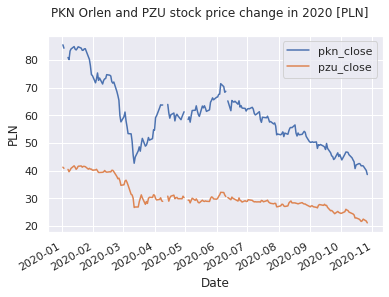

In [12]:
_ = close_pln.plot()
_ = plt.suptitle('PKN Orlen and PZU stock price change in 2020 [PLN]')
_ = plt.xlabel('Date')
_ = plt.ylabel('PLN')

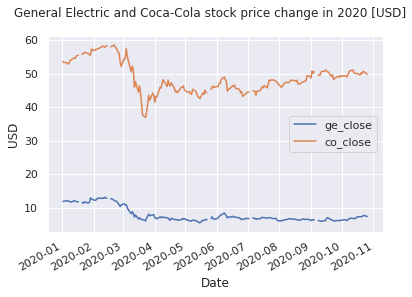

In [13]:

_ = close_usd.plot()
_ = plt.suptitle('General Electric and Coca-Cola stock price change in 2020 [USD]')
_ = plt.xlabel('Date')
_ = plt.ylabel('USD')

In [14]:
x_2020.reset_index(level=0, inplace=True)
x_2020

,Date,pkn_close,pzu_close,ge_close,co_close
0,2020-01-02,85.544,41.30,11.88,53.587
1,2020-01-03,84.324,40.90,11.92,53.296
2,2020-01-06,NaN,NaN,12.09,53.276
3,2020-01-07,80.960,40.51,12.00,52.866
4,2020-01-08,80.212,39.66,11.89,52.963
...,...,...,...,...,...
208,2020-10-21,41.800,21.70,7.32,49.990
209,2020-10-22,41.840,21.92,7.72,50.680
210,2020-10-23,41.760,22.53,7.63,50.520
211,2020-10-26,40.120,21.83,7.38,49.800


**Plots (Plotly Express)**

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pkn_close, name='PKN Orlen'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.pzu_close, name='PZU'))

fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.ge_close, name='General Electric'))
fig.add_trace(go.Scatter(x=x_2020['Date'], y=x_2020.co_close, name='Coca-Cola'))
fig.show()

In [17]:
data_all

,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
Date,,,,,,,,,,,,,,,,,,,,
2015-10-29,54.989,54.998,54.169,54.437,1009269.0,29.831,29.839,29.151,29.252,1298929.0,26.198,26.382,26.100,26.348,47183011.0,36.216,36.421,35.946,36.327,11104173.0
2015-10-30,54.307,54.601,53.868,54.143,1445843.0,29.252,29.549,29.080,29.390,2258996.0,26.243,26.340,25.962,25.972,79081665.0,36.336,36.388,35.956,35.956,18087553.0
2015-11-02,54.153,54.929,53.910,54.773,847234.0,29.390,29.808,29.268,29.526,1304965.0,25.991,26.401,25.933,26.401,66257648.0,35.929,35.965,35.572,35.862,19143069.0
2015-11-03,54.781,55.153,54.143,54.343,1128767.0,29.558,29.705,29.334,29.449,1282410.0,26.235,26.753,26.208,26.576,106705849.0,35.810,35.929,35.497,35.792,11417247.0
2015-11-04,54.376,55.964,54.169,55.032,2590256.0,29.639,29.948,29.449,29.558,1582509.0,26.538,26.753,26.458,26.528,117063966.0,35.887,35.987,35.563,35.634,12354142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,42.490,43.100,41.800,41.800,664705.0,22.200,22.270,21.560,21.700,2898446.0,7.280,7.410,7.270,7.320,73811105.0,49.960,50.430,49.770,49.990,12517411.0
2020-10-22,41.500,42.190,41.000,41.840,847850.0,21.610,22.140,21.290,21.920,3225477.0,7.330,7.750,7.320,7.720,95766854.0,51.170,51.200,50.380,50.680,20189227.0
2020-10-23,42.020,42.700,41.540,41.760,1372466.0,21.990,22.620,21.990,22.530,5260416.0,7.930,8.030,7.560,7.630,132563218.0,51.000,51.180,50.465,50.520,13491265.0


In [18]:
data_changed = data_all.reset_index()
data_changed

,Date,pkn_open,pkn_high,pkn_low,pkn_close,pkn_volume,pzu_open,pzu_high,pzu_low,pzu_close,pzu_volume,ge_open,ge_high,ge_low,ge_close,ge_volume,co_open,co_high,co_low,co_close,co_volume
0,2015-10-29,54.989,54.998,54.169,54.437,1009269.0,29.831,29.839,29.151,29.252,1298929.0,26.198,26.382,26.100,26.348,47183011.0,36.216,36.421,35.946,36.327,11104173.0
1,2015-10-30,54.307,54.601,53.868,54.143,1445843.0,29.252,29.549,29.080,29.390,2258996.0,26.243,26.340,25.962,25.972,79081665.0,36.336,36.388,35.956,35.956,18087553.0
2,2015-11-02,54.153,54.929,53.910,54.773,847234.0,29.390,29.808,29.268,29.526,1304965.0,25.991,26.401,25.933,26.401,66257648.0,35.929,35.965,35.572,35.862,19143069.0
3,2015-11-03,54.781,55.153,54.143,54.343,1128767.0,29.558,29.705,29.334,29.449,1282410.0,26.235,26.753,26.208,26.576,106705849.0,35.810,35.929,35.497,35.792,11417247.0
4,2015-11-04,54.376,55.964,54.169,55.032,2590256.0,29.639,29.948,29.449,29.558,1582509.0,26.538,26.753,26.458,26.528,117063966.0,35.887,35.987,35.563,35.634,12354142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2020-10-21,42.490,43.100,41.800,41.800,664705.0,22.200,22.270,21.560,21.700,2898446.0,7.280,7.410,7.270,7.320,73811105.0,49.960,50.430,49.770,49.990,12517411.0
1286,2020-10-22,41.500,42.190,41.000,41.840,847850.0,21.610,22.140,21.290,21.920,3225477.0,7.330,7.750,7.320,7.720,95766854.0,51.170,51.200,50.380,50.680,20189227.0
1287,2020-10-23,42.020,42.700,41.540,41.760,1372466.0,21.990,22.620,21.990,22.530,5260416.0,7.930,8.030,7.560,7.630,132563218.0,51.000,51.180,50.465,50.520,13491265.0
1288,2020-10-26,41.280,41.580,40.120,40.120,831604.0,22.100,22.250,21.800,21.830,2056444.0,7.460,7.560,7.280,7.380,104254426.0,50.340,50.510,49.200,49.800,14696396.0


In [19]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.ge_open, high=data_changed.ge_high, low=data_changed.ge_low, 
                                    close=data_changed.ge_close),layout=go.Layout(title_text='General Electric Company stock market'))
fig.show()

In [20]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.co_open, high=data_changed.co_high, low=data_changed.co_low, 
                                    close=data_changed.co_close),layout=go.Layout(title_text='Coca-Cola Company stock market'))
fig.show()

In [21]:
fig = go.Figure(data=go.Candlestick(x=data_changed.Date, open=data_changed.pkn_open, high=data_changed.pkn_high, low=data_changed.pkn_low, 
                                    close=data_changed.pkn_close),layout=go.Layout(title_text='Polski Koncern Naftowy Orlen Company stock market'))
fig.show()